## 🎯 مشروع: محاكاة خوارزمية Round-Robin

هذا المشروع يحاكي عمل **خوارزمية جدولة Round-Robin** باستخدام لغة بايثون.

### ✅ المميزات:
- يدعم إدخال **زمن الوصول (Arrival Time)** أو تجاهله.
- يحسب **زمن الانتظار** و**زمن الانتهاء** لكل عملية.
- يعرض **جدول النتائج** باستخدام مكتبة `pandas`.
- يرسم **مخطط Gantt** يوضح ترتيب التنفيذ باستخدام `matplotlib`.

### 🛠️ المدخلات:
- عدد العمليات.
- زمن التنفيذ لكل عملية.
- زمن الوصول (اختياري).
- قيمة الـ Time Quantum.





---



## 🎯 Project: Round-Robin Scheduling Simulation

This project simulates the **Round-Robin CPU scheduling algorithm** using Python.

### ✅ Features:
- Supports optional **arrival times**.
- Calculates **waiting time** and **turnaround time** for each process.
- Displays a **results table** using `pandas`.
- Draws a **Gantt chart** using `matplotlib`.

### 🛠️ Inputs:
- Number of processes
- Burst time for each process
- Arrival time (optional)
- Time quantum




---



Round Robin Scheduler
Do you have arrival times? (y/n): y
Enter number of processes: 3
Enter Burst Time for P1: 24
Enter Burst Time for P2: 3
Enter Burst Time for P3: 3
Enter Arrival Time for P1: 0
Enter Arrival Time for P2: 0
Enter Arrival Time for P3: 0
Enter Time Quantum: 4

 Process  Arrival Time  Burst Time  Waiting Time  Turnaround Time
     P1             0          24             6               30
     P2             0           3             4                7
     P3             0           3             7               10

Average Waiting Time: 5.67
Average Turnaround Time: 15.67


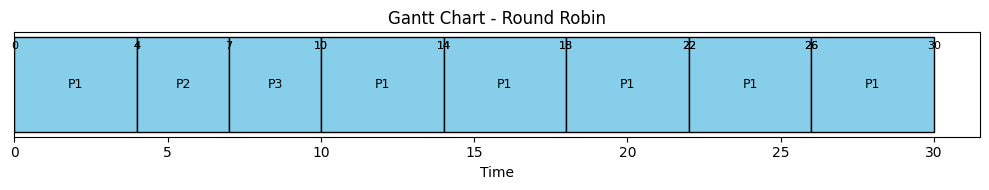

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

class RoundRobinScheduler:
    def __init__(self, processes, burst_times, quantum, arrival_times=None):
        # Initialize input data
        self.processes = processes
        self.burst_times = burst_times
        self.quantum = quantum
        # If arrival times are not provided, assume all processes arrive at time 0
        if arrival_times is None:
            self.arrival_times = [0] * len(processes)
        else:
            self.arrival_times = arrival_times

    def schedule(self):
        # Decide which scheduling function to use depending on arrival times
        if set(self.arrival_times) == {0}:
            return self.schedule_no_arrival()
        else:
            return self.schedule_with_arrival()

    def schedule_no_arrival(self):
        # Round Robin scheduling when all processes arrive at time 0
        n = len(self.processes)
        remaining_bt = self.burst_times.copy()
        waiting = [0] * n
        turnaround = [0] * n
        timeline = []
        current_time = 0

        while True:
            done = True
            for i in range(n):
                if remaining_bt[i] > 0:
                    done = False
                    start = current_time
                    exec_time = min(remaining_bt[i], self.quantum)
                    current_time += exec_time
                    remaining_bt[i] -= exec_time
                    end = current_time
                    timeline.append((self.processes[i], start, end))
                    if remaining_bt[i] == 0:
                        turnaround[i] = current_time
                        waiting[i] = turnaround[i] - self.burst_times[i]
            if done:
                break

        return waiting, turnaround, timeline

    def schedule_with_arrival(self):
        # Round Robin scheduling with arrival times
        n = len(self.processes)
        remaining_bt = self.burst_times.copy()
        waiting = [0] * n
        turnaround = [0] * n
        timeline = []
        current_time = 0
        ready_queue = []
        completed = []

        while len(completed) < n:
            # Add processes that have arrived to the ready queue
            for i in range(n):
                if self.arrival_times[i] <= current_time and i not in ready_queue and i not in completed:
                    ready_queue.append(i)

            if not ready_queue:
                # If the ready queue is empty, move to the next arrival
                next_time = min([self.arrival_times[i] for i in range(n) if i not in completed])
                timeline.append(("IDLE", current_time, next_time))
                current_time = next_time
                continue

            process_idx = ready_queue.pop(0)
            start = current_time
            exec_time = min(remaining_bt[process_idx], self.quantum)
            current_time += exec_time
            remaining_bt[process_idx] -= exec_time
            end = current_time
            timeline.append((self.processes[process_idx], start, end))

            if remaining_bt[process_idx] == 0:
                completed.append(process_idx)
                turnaround[process_idx] = current_time - self.arrival_times[process_idx]
                waiting[process_idx] = turnaround[process_idx] - self.burst_times[process_idx]
            else:
                # Process not finished, put it back at the end of the queue
                ready_queue.append(process_idx)

        return waiting, turnaround, timeline

    def print_results(self, waiting, turnaround):
        # Create a table with results using pandas
        df = pd.DataFrame({
            "Process": self.processes,
            "Arrival Time": self.arrival_times,
            "Burst Time": self.burst_times,
            "Waiting Time": waiting,
            "Turnaround Time": turnaround
        })

        print("\n", df.to_string(index=False))
        print(f"\nAverage Waiting Time: {sum(waiting)/len(waiting):.2f}")
        print(f"Average Turnaround Time: {sum(turnaround)/len(turnaround):.2f}")

    def plot_gantt_chart(self, timeline):
        # Draw a simple Gantt chart
        fig, ax = plt.subplots(figsize=(10, 2))

        for pid, start, end in timeline:
            ax.barh(0, end-start, left=start, color="skyblue", edgecolor='black')
            ax.text((start+end)/2, 0, pid, ha='center', va='center', fontsize=9)
            ax.text(start, 0.3, str(start), ha='center', fontsize=8)
            ax.text(end, 0.3, str(end), ha='center', fontsize=8)

        plt.title('Gantt Chart - Round Robin')
        plt.xlabel('Time')
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def main():
    print("Round Robin Scheduler")

    # Ask user if arrival times should be used
    has_arrival = input("Do you have arrival times? (y/n): ").lower() == 'y'
    n = int(input("Enter number of processes: "))
    processes = [f"P{i+1}" for i in range(n)]
    bursts = []
    arrivals = []

    # Get burst times from user
    for p in processes:
        bursts.append(int(input(f"Enter Burst Time for {p}: ")))

    # Get arrival times if needed
    if has_arrival:
        for p in processes:
            arrivals.append(int(input(f"Enter Arrival Time for {p}: ")))
    else:
        arrivals = None

    quantum = int(input("Enter Time Quantum: "))

    # Create scheduler object and run scheduling
    scheduler = RoundRobinScheduler(processes, bursts, quantum, arrivals)
    waiting, turnaround, timeline = scheduler.schedule()

    # Display results and draw Gantt chart
    scheduler.print_results(waiting, turnaround)
    scheduler.plot_gantt_chart(timeline)

if __name__ == "__main__":
    main()


In [21]:
#!jupyter nbconvert --to pdf --output "RoundRobin_Scheduler.pdf" "/content/Copy of OS_Project_round-robin.ipynb"
#!jupyter nbconvert --to html --output "output.html" "/content/OS_Project_round-robin.ipynb"
import os

# عرض جميع الملفات في مجلد content
for file in os.listdir("/content"):
    print(file)


.config
sample_data
